In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
wgi = pd.read_excel('wgidataset.xlsx')

In [50]:
rl = wgi[wgi['indicator'] == 'rl'].reset_index(drop=True)

In [51]:
rl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5350 entries, 0 to 5349
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   codeindyr     5350 non-null   object
 1   code          5350 non-null   object
 2   countryname   5350 non-null   object
 3   year          5350 non-null   int64 
 4   indicator     5350 non-null   object
 5   estimate      5350 non-null   object
 6   stddev        5350 non-null   object
 7   nsource       5350 non-null   object
 8   pctrank       5350 non-null   object
 9   pctranklower  5350 non-null   object
 10  pctrankupper  5350 non-null   object
dtypes: int64(1), object(10)
memory usage: 459.9+ KB


In [52]:
rl = rl.iloc[:, [2, 3, 8]]

In [53]:
rl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5350 entries, 0 to 5349
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   countryname  5350 non-null   object
 1   year         5350 non-null   int64 
 2   pctrank      5350 non-null   object
dtypes: int64(1), object(2)
memory usage: 125.5+ KB


In [54]:
rl = rl.replace({
    '..': np.nan
})

C:\Users\lazar\AppData\Local\Temp\ipykernel_11508\3067788708.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rl = rl.replace({


In [55]:
rl['pctrank'].describe()

count    5233.000000
mean       50.050390
std        29.056678
min         0.000000
25%        24.880383
50%        50.000000
75%        75.829384
max       100.000000
Name: pctrank, dtype: float64

In [56]:
rl_mundo = rl.groupby('year')['pctrank'].median().reset_index()

In [57]:
rl_mundo.head()

,year,pctrank
0,1996,50.0
1,1998,50.0
2,2000,50.0
3,2002,50.0
4,2003,50.0


In [58]:
rl_mundo['regiao'] = 'Mundo'

In [59]:
rl_mundo.head()

,year,pctrank,regiao
0,1996,50.0,Mundo
1,1998,50.0,Mundo
2,2000,50.0,Mundo
3,2002,50.0,Mundo
4,2003,50.0,Mundo


In [60]:
rl_mundo = rl_mundo.melt(
    id_vars=['year', 'regiao'],
    value_vars='pctrank',
    var_name='porcentagem',
    value_name='valores'
)

In [61]:
rl_mundo.head()

,year,regiao,porcentagem,valores
0,1996,Mundo,pctrank,50.0
1,1998,Mundo,pctrank,50.0
2,2000,Mundo,pctrank,50.0
3,2002,Mundo,pctrank,50.0
4,2003,Mundo,pctrank,50.0


In [62]:
rl_brasil = rl.loc[rl['countryname'] == 'Brazil'].reset_index(drop=True)

In [63]:
rl_brasil.head()

,countryname,year,pctrank
0,Brazil,1996,44.221104
1,Brazil,1998,45.000000
2,Brazil,2000,42.288559
3,Brazil,2002,43.781094
4,Brazil,2003,42.786068


In [64]:
rl_brasil = rl_brasil.melt(
    id_vars=['year', 'countryname'],
    value_vars='pctrank',
    var_name='porcentagem',
    value_name='valores'
)

In [65]:
rl_brasil.head()

,year,countryname,porcentagem,valores
0,1996,Brazil,pctrank,44.221104
1,1998,Brazil,pctrank,45.000000
2,2000,Brazil,pctrank,42.288559
3,2002,Brazil,pctrank,43.781094
4,2003,Brazil,pctrank,42.786068


In [66]:
rl_brasil = rl_brasil.rename(columns={
    'countryname': 'regiao'
})

In [67]:
rl_brasil = rl_brasil.replace({
    'Brazil': 'Brasil'
})

In [68]:
rl_brasil.head()

,year,regiao,porcentagem,valores
0,1996,Brasil,pctrank,44.221104
1,1998,Brasil,pctrank,45.000000
2,2000,Brasil,pctrank,42.288559
3,2002,Brasil,pctrank,43.781094
4,2003,Brasil,pctrank,42.786068


In [69]:
df = pd.concat([rl_mundo, rl_brasil], ignore_index=True)

In [70]:
df

,year,regiao,porcentagem,valores
0,1996,Mundo,pctrank,50.000000
1,1998,Mundo,pctrank,50.000000
2,2000,Mundo,pctrank,50.000000
3,2002,Mundo,pctrank,50.000000
4,2003,Mundo,pctrank,50.000000
5,2004,Mundo,pctrank,50.000000
6,2005,Mundo,pctrank,50.000000
7,2006,Mundo,pctrank,50.000000
8,2007,Mundo,pctrank,50.000000
9,2008,Mundo,pctrank,50.000000


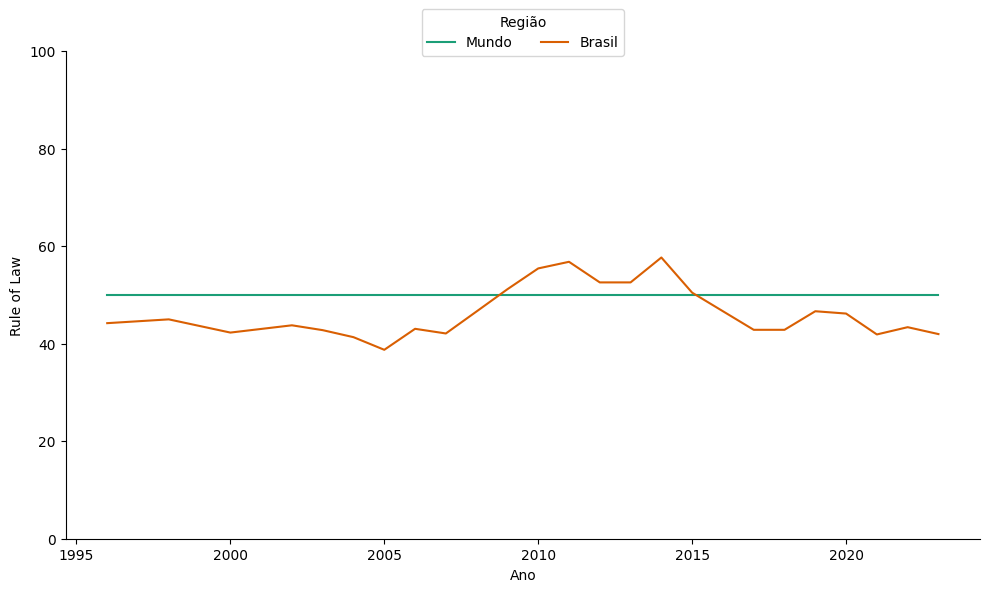

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(df, x='year', y='valores', hue='regiao', palette='Dark2')

ax.set_ylabel('Rule of Law')
ax.set_xlabel('Ano')
ax.set_ylim(0, 100)
sns.despine()
plt.legend(title='Região', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncols=2)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/comparacao_wgi_rl_brasil_mundo.png', dpi=300, bbox_inches='tight')
plt.show()